# Compare samples with SampComp

## In brief

`SampComp` first parses the sample eventalign collapse files and pileups the observed results per reference at position level. Then, positions are compared using various statistical methods and the statistics are stored in a shelve DBM database containing the results for all positions with sufficient coverage. The API returns a `SampCompDB` database wrapper object that can be subsequently interrogated to extract data and plots.

## Quick start

**Example CLI call**

```bash
nanocompore sampcomp \
    --file_list1 ./data/S1_R1.tsv,./data/S1_R2.tsv \
    --file_list2 ./data/S2_R1.tsv,./data/S2_R2.tsv \
    --label1 S1 \
    --label2 S2 \
    --fasta ./reference/ref.fa \
    --outpath ./results/ \
```

**Example API call**

```python
# Import package
from nanocompore.SampComp import SampComp

# Init the object
s = SampComp(
    eventalign_fn_dict = {
        'S1':{'rep1':'./data/S1_R1.tsv', 'rep2':'./data/S1_R2.tsv'},
        'S2':{'rep1':'./data/S2_R1.tsv', 'rep2':'./data/S2_R2.tsv'}},
    outpath = "./results/",
    fasta_fn = "./reference/ref.fa")

# Run the analysis
s()
```

## Description of main options

`SampComp` provides a very flexible analysis framework with a few mandatory options and many optional parameters. The full CLI and API documentations are provided at the bottom of this page.

#### Sample files

`SampComp` requires sample files obtained with `NanopolishComp EventalignCollapse` as explained before (see [data preparation](data_preparation.md)) for both the control and the experimental conditions. 2 conditions are expected, and at least 2 sample replicates per conditions are highly recommended. If `SampComp` is called through the CLI the files can be provides using either relevant command options or a YAML file. If using the Python API, one can pass either a python dictionary or a YAML file.

!!! info "YAML file option (CLI or API)"
    This option allows to pass a YAML formatted file indicating the sample condition labels and paths to data files with the option `--sample_yaml` for the CLI or directly to `eventalign_fn_dict` for the API. The file should be formatted as follow:

    ```yaml
    WT:
        rep1:   path/to/sample1/rep1/data
        rep2:   path/to/sample1/rep2/data

    KO:
        rep1:   path/to/sample2/rep1/data
        rep2:   path/to/sample2/rep2/data
    ```

!!! info "Command line option (CLI only)"
	This option requires to provide 1 comma separated list of files per condition using `--file_list1` and `--file_list2` arguments as well as the labels for condition each conditions using `--label1` and `--label2`.

!!! info "Python dictionary (API only)"
    This option allows to pass a multi-level python dictionary containing the sample condition labels and paths to data files. The dictionary should be formatted as follow:

    ```python
    eventalign_fn_dict = {
        "WT":  {"rep1":"path/to/sample1/rep1/data", "rep2":"path/to/sample1/rep2/data"},
        "KO": {"rep1":"path/to/sample2/rep1/data", "rep2":"path/to/sample2/rep2/data"}
        }
    ```

#### Transcriptome reference FASTA file

A transcriptome FASTA reference file is required to extract kmer sequences during the analyses. The reference has to be the same as the one used at the mapping step. (CLI: `--fasta`, API: `fasta_fn`)

#### Output folder

Although it is not mandatory, it is recommended to provide a path to a directory where the program will output the result files  (CLI: `--outpath`, API: `outpath`). In addition, users can also specify a prefix for the files to be generated (CLI: `--outprefix`, API: `outprefix`). Finally, if the outpath directory already exists, the program will raise an error to prevent erasing result files accidentally. To ignore the error one as to specify to overwrite previous results (CLI: `--outprefix`, API: `outprefix`).

#### Genome annotation BED file

Optionally, a BED file containing the genome annotations corresponding to the transcriptome fasta file can be provided. If this file is given, Nanocompore will also convert the transcript coordinates into the genome space (CLI: `--bed`, API: `bed_fn`)

#### Statistical options

`SampComp` implements several statistical methods to evaluate the difference between the 2 conditions (`comparison_method`).

* Gaussian Mixture Model = GMM (default)
* Kolmogorov–Smirnov test = KS (default)
* Mann–Whitney U test = MW
* T-test = TT

In addition, it is also possible to specify the number of adjacent positions to take into account for the pvalue calculation (`sequence_context`) as well as the weights to give to adjacent position, using either an "uniform" or a "harmonic" distribution (`sequence_context_weights`).

#### Coverage options

The default coverage threshold for `SampComp` to perform a statistical test is 50 reads in each replicates. This is quite conservative and can be modified if needed (`min_coverage`). In addition, to reduce the computational burden it is possible to randomly down-sample the number of reads for high coverage references (`downsample_high_coverage`).

#### Manually exclude or include references (API only)

The API allows to specify references to be included or excluded from the analysis (`select_ref_id` and
`exclude_ref_id`). This can be useful to analyse a specific transcripts set only or to run a small test before analysing the entire dataset.

# Advanced API Usage

### Import the package

In [35]:
from nanocompore.SampComp import SampComp

### Using a Python dictionary to specify the locations of the eventalign files

Default option using a multilevel dictionary.

In [36]:
# Init the object
s = SampComp (
    eventalign_fn_dict = {
        "S1":{
            "R1":'./sample_files/modified_rep_1.tsv', 
            "R2":"./sample_files/modified_rep_2.tsv"},
        "S2":{
            "R1":'./sample_files/unmodified_rep_1.tsv', 
            "R2":"./sample_files/unmodified_rep_2.tsv"}},
    outpath= "./results",
    fasta_fn = "./reference/ref.fa",
    overwrite=True,
    nthreads=6)

# Run the analysis
db = s()

Initialising SampComp and checking options
Initialising Whitelist and checking options
Reading eventalign index files
	References found in index: 5
Filtering out references with low coverage
	References remaining after reference coverage filtering: 5
Starting data processing
100%|██████████| 5/5 [00:10<00:00,  2.60s/ Processed References]
Loading SampCompDB
Calculate results


### Using a YAML file instead to specify the files location

Just pass a path to a YAML file as explained before instead of a dictionary. 

In [38]:
# Init the object
s = SampComp (
    eventalign_fn_dict = "./samples.yaml",
    outpath= "./results",
    fasta_fn = "./reference/ref.fa",
    overwrite=True)

# Run the analysis
db = s ()

Initialising SampComp and checking options
Initialising Whitelist and checking options
Reading eventalign index files
	References found in index: 5
Filtering out references with low coverage
	References remaining after reference coverage filtering: 5
Starting data processing
100%|██████████| 5/5 [00:19<00:00,  3.90s/ Processed References]
Loading SampCompDB
Calculate results


### Tweaking the statistical tests

In [44]:
# Init the object
s = SampComp (
    eventalign_fn_dict = "./samples.yaml",
    outpath = "./results",
    fasta_fn = "./reference/ref.fa",
    overwrite=True,
    comparison_methods=["GMM", "MW", "KS", "TT"],
    sequence_context=2,
    sequence_context_weights="uniform",
    logit = True,
    )

# Run the analysis
db = s ()

Initialising SampComp and checking options
Initialising Whitelist and checking options
Reading eventalign index files
	References found in index: 5
Filtering out references with low coverage
	References remaining after reference coverage filtering: 5
Starting data processing
100%|██████████| 5/5 [00:26<00:00,  5.41s/ Processed References]
Loading SampCompDB
Calculate results


(<Figure size 2160x720 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f383bec4278>)

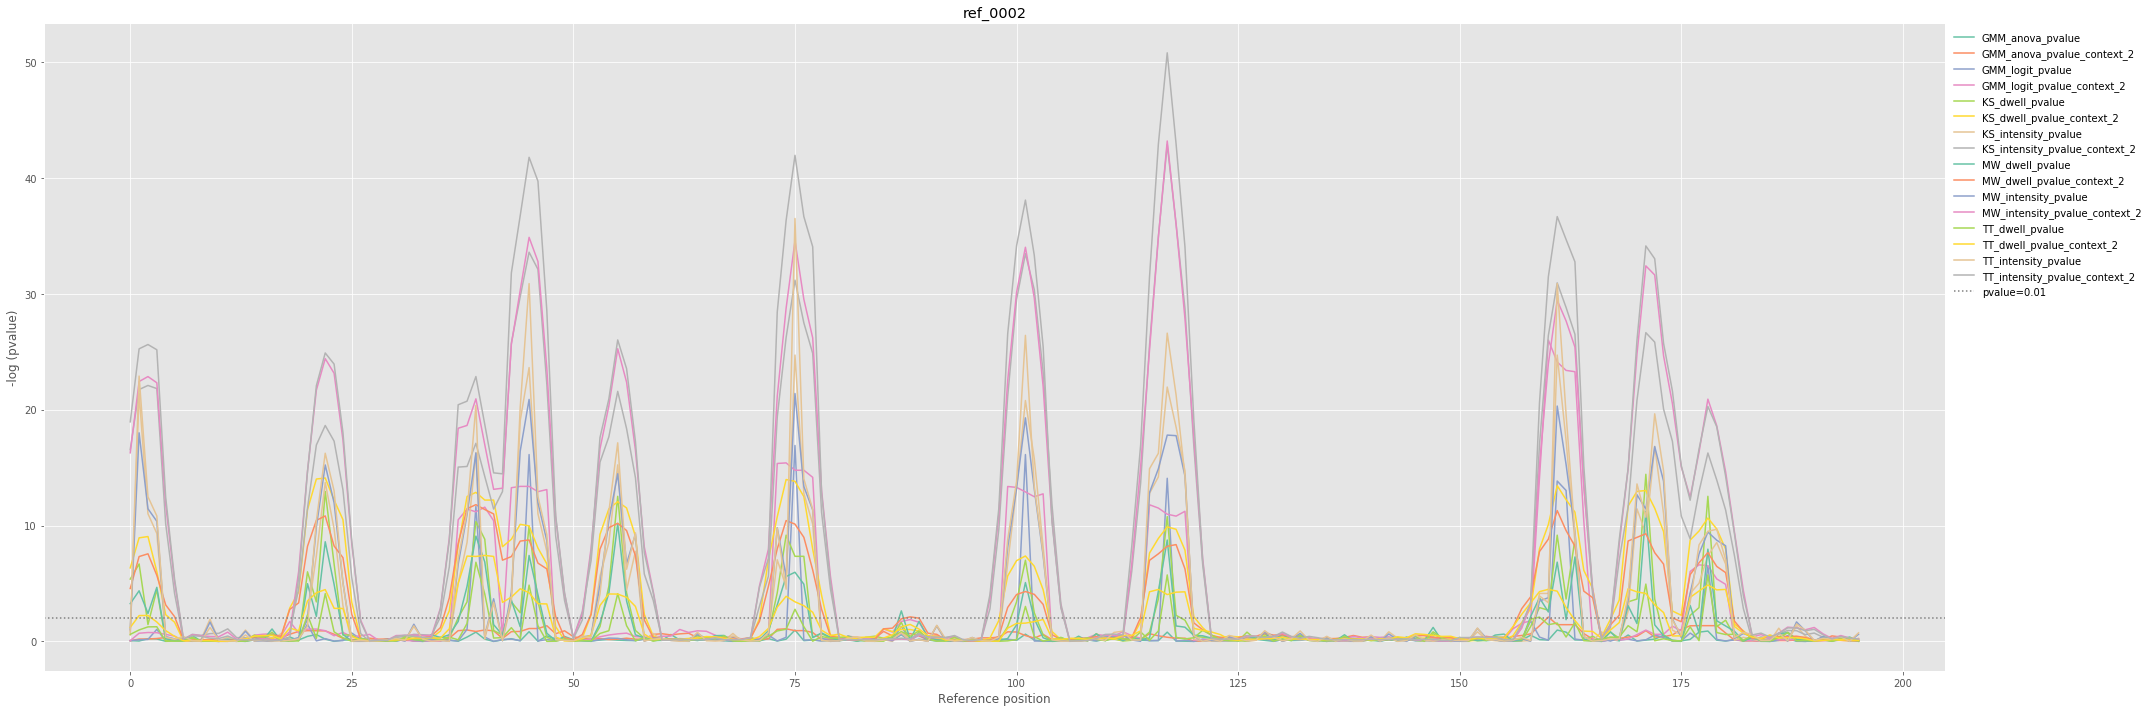

In [45]:
db.plot_pvalue("ref_0002")

# Full CLI and API documentations

## API documentation

In [33]:
from nanocompore.SampComp import SampComp
from nanocompore.common import jhelp
jhelp(SampComp)

---

**nanocompore.SampComp.\__init__**

Initialise a `SampComp` object and generates a white list of references with sufficient coverage for subsequent analysis. The retuned object can then be called to start the analysis.

---

* **eventalign_fn_dict** *: dict or str (required)*

Multilevel dictionnary indicating the condition_label, sample_label and file name of the eventalign_collapse output. 2 conditions are expected and at least 2 sample replicates per condition are highly recommended. One can also pass YAML file describing the samples instead. Example `d = {"S1": {"R1":"path1.tsv", "R2":"path2.tsv"}, "S2": {"R1":"path3.tsv", "R2":"path4.tsv"}}`

* **outpath** *: directory_path (default = results)*

Path to the output folder.

* **outprefix** *: str (default = out_)*

text outprefix for all the files generated by the function.

* **overwrite** *: bool (default = False)*

If the output directory already exists, the standard behaviour is to raise an error to prevent overwriting existing data This option ignore the error and overwrite data if they have the same outpath and outprefix.

* **fasta_fn** *: file_path (required)*

Path to a fasta file corresponding to the reference used for read alignment.

* **bed_fn** *: file_path (default = None)*

Path to a BED file containing the annotation of the transcriptome used as reference when mapping.

* **whitelist** *: nancocompore.Whitelist object (default = None)*

Whitelist object previously generated with nanocompore Whitelist. If not given, will be automatically generated.

* **comparison_methods** *: list of str from {MW,KS,TT,GMM} (default = ['GMM', 'KS'])*

Statistical method to compare the 2 samples (mann_whitney or MW, kolmogorov_smirnov or KS, t_test or TT, gaussian_mixture_model or GMM). This can be a list or a comma separated string.

* **logit** *: bool (default = False)*

Force logistic regression even if we have less than 2 replicates in any condition.

* **allow_warnings** *: bool (default = False)*

If True runtime warnings during the ANOVA tests don't raise an error.

* **sequence_context** *: int (default = 0)*

Extend statistical analysis to contigous adjacent base if available.

* **sequence_context_weights** *: str {uniform,harmonic} (default = uniform)*

type of weights to used for combining p-values.

* **min_coverage** *: int (default = 30)*

minimal read coverage required in all sample.

* **downsample_high_coverage** *: int (default = 0)*

For reference with higher coverage, downsample by randomly selecting reads.

* **max_invalid_kmers_freq** *: float (default = 0.1)*

maximum frequency of NNNNN, mismatching and missing kmers in reads.

* **select_ref_id** *: list or str (default = [])*

if given, only reference ids in the list will be selected for the analysis.

* **exclude_ref_id** *: list or str (default = [])*

if given, refid in the list will be excluded from the analysis.

* **nthreads** *: int <= 3 (default = 3)*

Number of threads (two are used for reading and writing, all the others for parallel processing).

* **log_level** *: str {warning,info,debug} (default = info)*

Set the log level.



## CLI documentation 

```bash
nanocompore sampcomp --help
```

```text
usage: nanocompore sampcomp [-h] [--sample_yaml sample_yaml]
                            [--file_list1 /path/to/Condition1_rep1,/path/to/Codition1_rep2]
                            [--file_list2 /path/to/Condition2_rep1,/path/to/Codition2_rep2]
                            [--label1 Condition1] [--label2 Condition2]
                            --fasta FASTA [--bed BED] [--outpath OUTPATH]
                            [--outprefix OUTPREFIX] [--overwrite]
                            [--max_invalid_kmers_freq MAX_INVALID_KMERS_FREQ]
                            [--min_coverage MIN_COVERAGE]
                            [--downsample_high_coverage DOWNSAMPLE_HIGH_COVERAGE]
                            [--min_ref_length MIN_REF_LENGTH]
                            [--comparison_methods COMPARISON_METHODS]
                            [--sequence_context {0,1,2,3,4}]
                            [--sequence_context_weights {uniform,harmonic}]
                            [--pvalue_thr PVALUE_THR] [--logit]
                            [--allow_warnings] [--nthreads NTHREADS]
                            [--log_level {warning,info,debug}]

Compare 2 samples and find significant signal

* Minimal example with file_list arguments
    nanocompore sampcomp -1 f1.tsv,f2.tsv -2 f3.tsv,f4.tsv -f ref.fa -o results
* Minimal example with sample YAML file
    nanocompore sampcomp -y samples.yaml -f ref -o results

optional arguments:
  -h, --help            show this help message and exit

YAML sample files:
  Option allowing to describe sample files in a YAML file

  --sample_yaml sample_yaml, -y sample_yaml
                        YAML file containing the sample file labels. See
                        formatting in documentation. (required if --file_list1
                        and --file_list2 not given)

Arguments sample files:
  Option allowing to describe sample files directly as command line arguments

  --file_list1 /path/to/Condition1_rep1,/path/to/Codition1_rep2, -1 /path/to/Condition1_rep1,/path/to/Codition1_rep2
                        Comma separated list of NanopolishComp files for label
                        1. (required if --sample_yaml not given)
  --file_list2 /path/to/Condition2_rep1,/path/to/Codition2_rep2, -2 /path/to/Condition2_rep1,/path/to/Codition2_rep2
                        Comma separated list of NanopolishComp files for label
                        2. (required if --sample_yaml not given)
  --label1 Condition1   Label for files in --file_list1 (default: Condition1)
  --label2 Condition2   Label for files in --file_list2 (default: Condition2)

Input/Output options:
  --fasta FASTA, -f FASTA
                        Fasta file used for mapping (required)
  --bed BED             BED file with annotation of transcriptome used for
                        mapping (optional)
  --outpath OUTPATH, -o OUTPATH
                        Path to the output folder (default: results)
  --outprefix OUTPREFIX, -p OUTPREFIX
                        text outprefix for all the files generated by the
                        function (default: out_)
  --overwrite           Use --outpath even if it exists already (default:
                        False)

Transcript filtering options:
  --max_invalid_kmers_freq MAX_INVALID_KMERS_FREQ
                        Max fequency of invalid kmers (default: 0.1)
  --min_coverage MIN_COVERAGE
                        Minimum coverage required in each condition to do the
                        comparison (default: 30)
  --downsample_high_coverage DOWNSAMPLE_HIGH_COVERAGE
                        Used for debug: transcripts with high covergage will
                        be downsampled (default: 0)
  --min_ref_length MIN_REF_LENGTH
                        Minimum length of a reference transcript to include it
                        in the analysis (default: 100)

Statistical testing options:
  --comparison_methods COMPARISON_METHODS
                        Comma separated list of comparison methods. Valid
                        methods are: GMM,KS,TT,MW. (default: GMM,KS)
  --sequence_context {0,1,2,3,4}
                        Sequence context for combining p-values (default: 0)
  --sequence_context_weights {uniform,harmonic}
                        Type of weights to use for combining p-values
  --pvalue_thr PVALUE_THR
                        Adjusted p-value threshold for reporting significant
                        sites (default: 0.05)
  --logit               Use logistic regression testing also when all
                        conditions have replicates (default: False)
  --allow_warnings      If True runtime warnings during the ANOVA tests don't
                        raise an error (default: False)

Other options:
  --nthreads NTHREADS, -t NTHREADS
                        Number of threads (default: 3)
  --log_level {warning,info,debug}
                        log level (default: info)
```

## More advanced usage examples

#### Tweaking statistical options

In [13]:
# Init the object
s = SampComp (
    eventalign_fn_dict = "./samples.yaml",
    outpath= "./results",
    fasta_fn = "./reference/ref.fa",
    overwrite=True,
    comparison_methods=["GMM", "MW", "KS", "TT"])

# Run the analysis
db = s ()

Initialising SampComp and checking options
Initialising Whitelist and checking options
Reading eventalign index files
	References found in index: 5
Filtering out references with low coverage
	References remaining after reference coverage filtering: 5
Starting data processing
100%|██████████| 5/5 [00:19<00:00,  3.66s/ Processed References]
Loading SampCompDB
Calculate results


(<Figure size 2160x720 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f383e868748>)

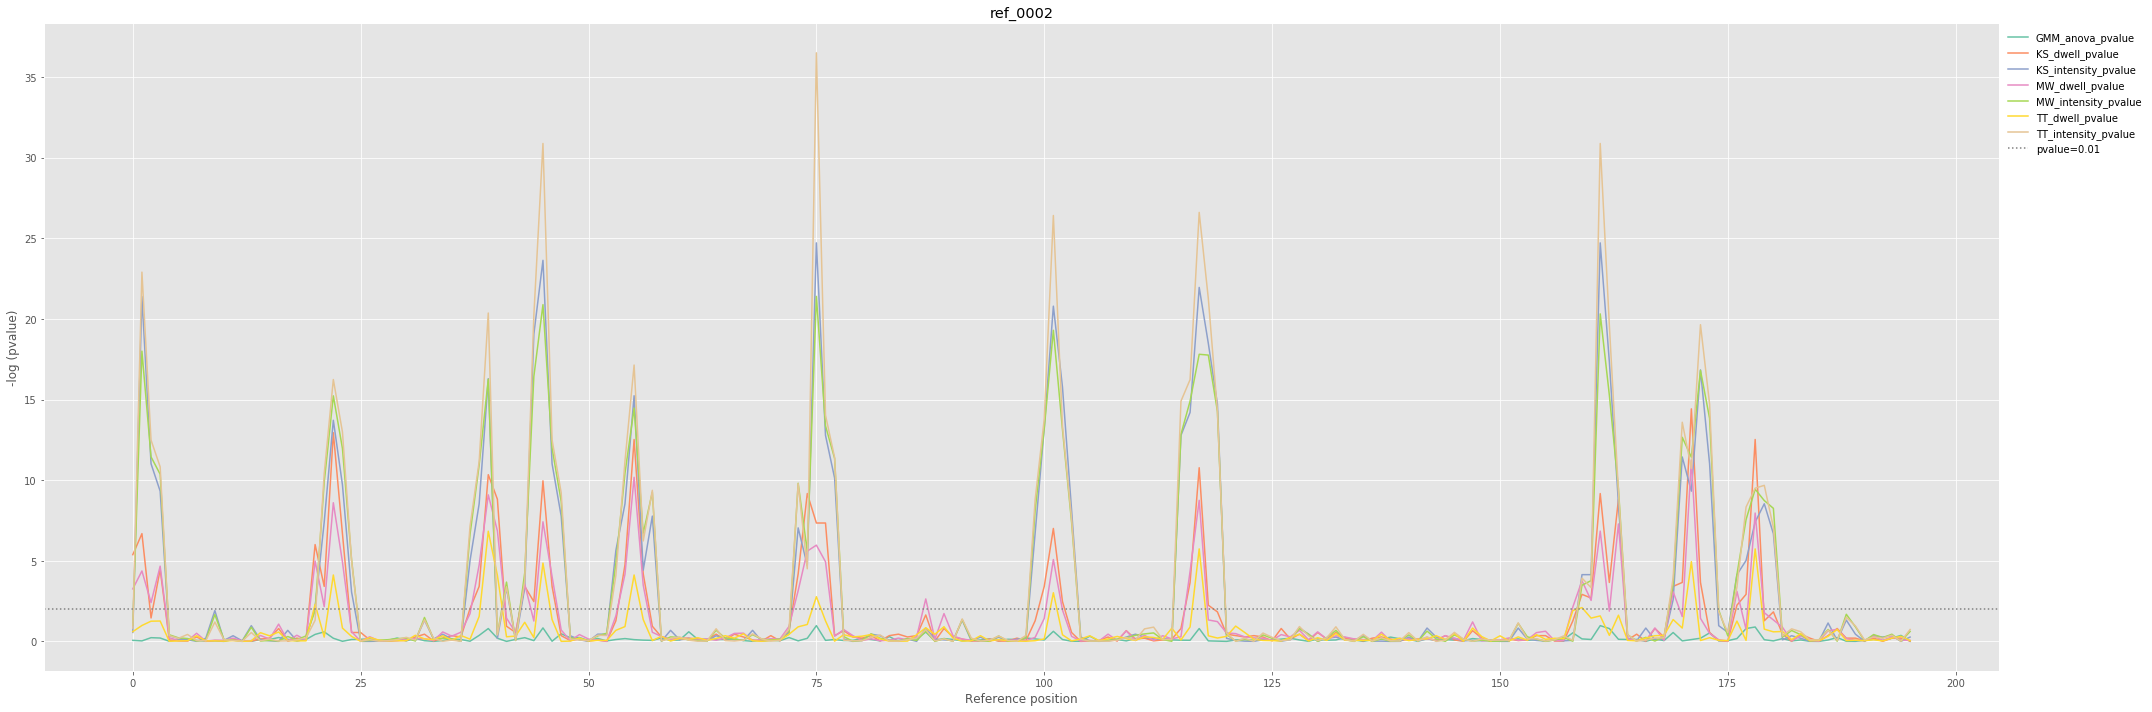

#### Tweaking statistical options

In [17]:
# Init the object
s = SampComp (
    eventalign_fn_dict = "./samples.yaml",
    outpath = "./results",
    fasta_fn = "./reference/ref.fa",
    comparison_methods=["GMM", "MW", "KS"],
    sequence_context=2,
    sequence_context_weights='harmonic',
    overwrite=True)

# Run the analysis
db = s ()

Initialising SampComp and checking options
Initialising Whitelist and checking options
Reading eventalign index files
	References found in index: 5
Filtering out references with low coverage
	References remaining after reference coverage filtering: 5
Starting data processing
100%|██████████| 5/5 [00:17<00:00,  3.50s/ Processed References]
Loading SampCompDB
Calculate results


(<Figure size 2160x720 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f383c1e3898>)

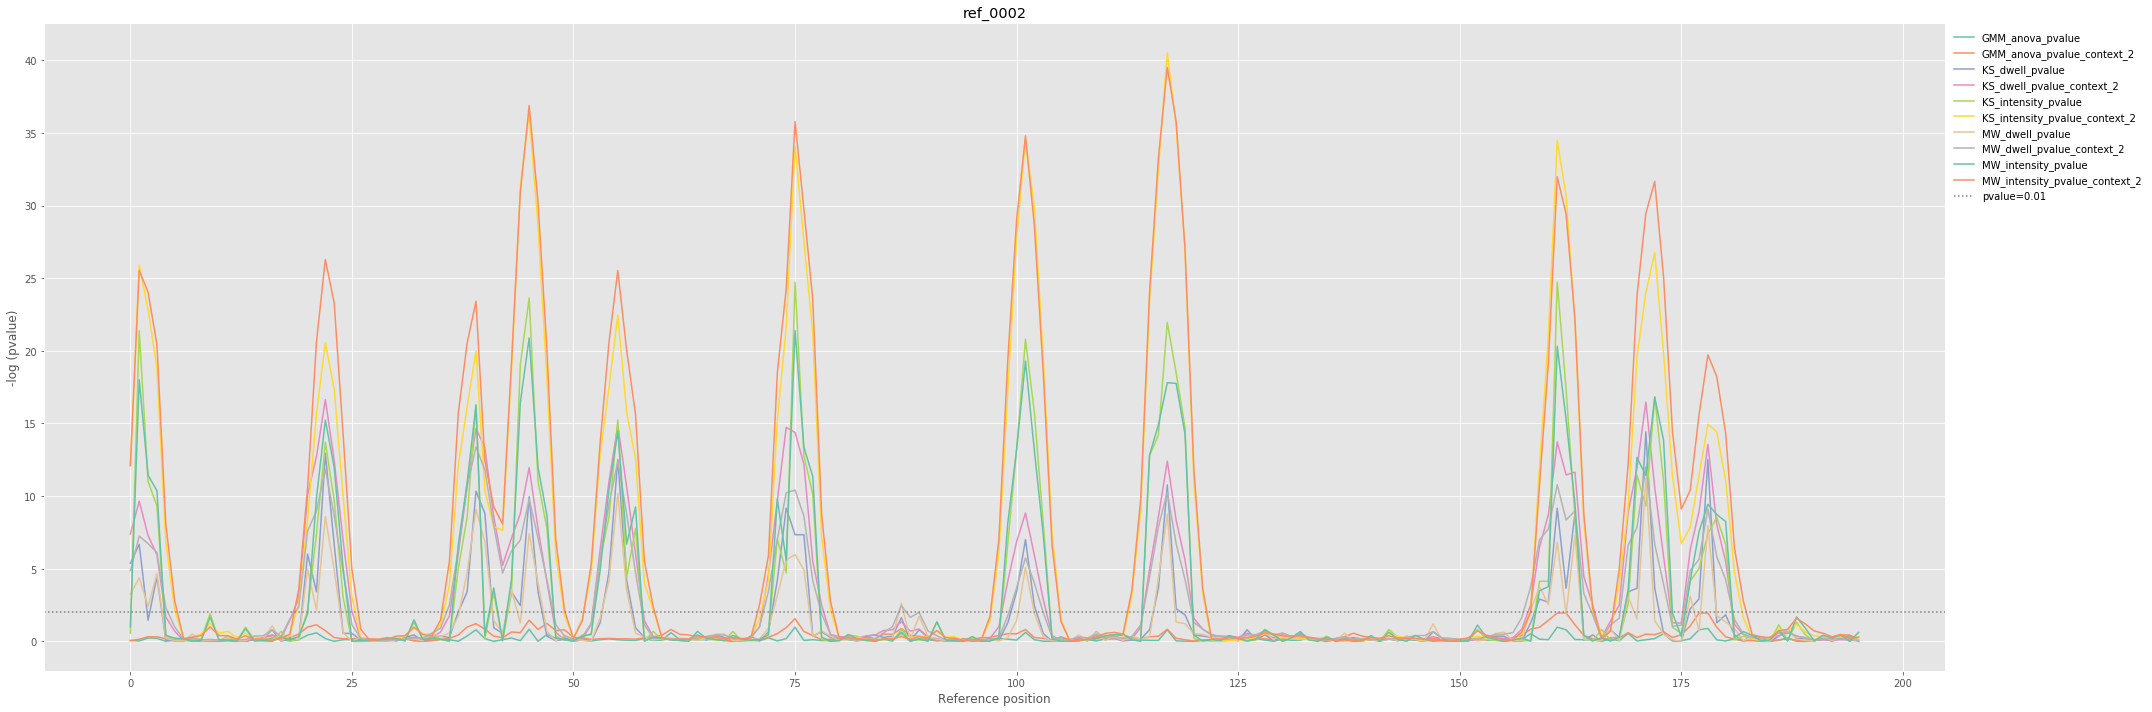

In [18]:
db.plot_pvalue("ref_0002")

## Full API documentation